In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans



In [2]:
df=pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
df

Date   Time                                           Location  \
0     09/17/1908  17:18                                Fort Myer, Virginia   
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #  \
0                Military - U.S. Army      NaN   
1                Military - U.S. Navy      NaN   
2                             Private        -   
3              Military - German Navy      NaN   
4              Military - German Navy      NaN   
...                               ...      ...   
5263  Military - Indonesian Air Force      NaN   
5264                      Service Air      NaN   
5265                       Air France      447   
5266                       Strait Air      NaN   
5267      Military - Indian Air Force      NaN   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type Registration cn/In  Aboard  Fatalities  \
0                     Wright Flyer III          NaN     1     2.0         1.0   
1                            Dirigible          NaN   NaN     5.0         5.0   
2                     Curtiss seaplane          NaN   NaN     1.0         1.0   
3               Zeppelin L-1 (airship)          NaN   NaN    20.0        14.0   
4               Zeppelin L-2 (airship)          NaN   NaN    30.0        30.0   
...                                ...          ...   ...     ...         ...   
5263           Lockheed C-130 Hercules       A-1325  1982   112.0        98.0   
5264                     Antonov An-26       9Q-CSA  5005     4.0         4.0   
5265                   Airbus A330-203       F-GZCP   660   228.0       228.0   
5266  Britten-Norman BN-2A-27 Islander      C-FJJR    424     1.0         1.0   
5267                     Antonov An-32          NaN   NaN    13.0        13.0   

      Ground                                            Summary  
0        0.0  During a demonstration flight, a U.S. Army fly...  
1        0.0  First U.S. dirigible Akron exploded just offsh...  
2        0.0  The first fatal airplane accident in Canada oc...  
3        0.0  The airship flew into a thunderstorm and encou...  
4        0.0  Hydrogen gas which was being vented was sucked...  
...      ...                                                ...  
5263     2.0  While on approach, the military transport cras...  
5264     NaN  The cargo plane crashed while on approach to I...  
5265     0.0  The Airbus went missing over the AtlantiOcean ...  
5266     0.0  The air ambulance crashed into hills while att...  
5267     0.0  The military transport went missing while en r...  

[5268 rows x 13 columns]

In [4]:
df.describe()

Aboard   Fatalities       Ground
count  5246.000000  5256.000000  5246.000000
mean     27.554518    20.068303     1.608845
std      43.076711    33.199952    53.987827
min       0.000000     0.000000     0.000000
25%       5.000000     3.000000     0.000000
50%      13.000000     9.000000     0.000000
75%      30.000000    23.000000     0.000000
max     644.000000   583.000000  2750.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [6]:
df.isna()

Date   Time  Location  Operator  Flight #  Route   Type  Registration  \
0     False  False     False     False      True  False  False          True   
1     False  False     False     False      True  False  False          True   
2     False   True     False     False     False   True  False          True   
3     False  False     False     False      True   True  False          True   
4     False  False     False     False      True   True  False          True   
...     ...    ...       ...       ...       ...    ...    ...           ...   
5263  False  False     False     False      True  False  False         False   
5264  False   True     False     False      True  False  False         False   
5265  False  False     False     False     False  False  False         False   
5266  False  False     False     False      True  False  False         False   
5267  False   True     False     False      True  False  False          True   

      cn/In  Aboard  Fatalities  Ground  Summary  
0     False   False       False   False    False  
1      True   False       False   False    False  
2      True   False       False   False    False  
3      True   False       False   False    False  
4      True   False       False   False    False  
...     ...     ...         ...     ...      ...  
5263  False   False       False   False    False  
5264  False   False       False    True    False  
5265  False   False       False   False    False  
5266  False   False       False   False    False  
5267   True   False       False   False    False  

[5268 rows x 13 columns]

In [7]:
df.isna().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [8]:
df.drop(['Registration'],axis=1,inplace=True)

In [9]:
df.drop(['Time'],axis=1,inplace=True)

In [12]:
df.drop(['cn/In'],axis=1,inplace=True)

In [13]:
df.drop(['Flight #'],axis=1,inplace=True)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5268 non-null   object 
 1   Location    5248 non-null   object 
 2   Operator    5250 non-null   object 
 3   Route       3562 non-null   object 
 4   Type        5241 non-null   object 
 5   Aboard      5246 non-null   float64
 6   Fatalities  5256 non-null   float64
 7   Ground      5246 non-null   float64
 8   Summary     4878 non-null   object 
dtypes: float64(3), object(6)
memory usage: 370.5+ KB


In [15]:
#We dropped these columns as they contained data and values which were largely null or irrelevent to our data visualization
df


Date                                           Location  \
0     09/17/1908                                Fort Myer, Virginia   
1     07/12/1912                            AtlantiCity, New Jersey   
2     08/06/1913                 Victoria, British Columbia, Canada   
3     09/09/1913                                 Over the North Sea   
4     10/17/1913                         Near Johannisthal, Germany   
...          ...                                                ...   
5263  05/20/2009                             Near Madiun, Indonesia   
5264  05/26/2009                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009                  State of Arunachal Pradesh, India   

                             Operator  \
0                Military - U.S. Army   
1                Military - U.S. Navy   
2                             Private   
3              Military - German Navy   
4              Military - German Navy   
...                               ...   
5263  Military - Indonesian Air Force   
5264                      Service Air   
5265                       Air France   
5266                       Strait Air   
5267      Military - Indian Air Force   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type  Aboard  Fatalities  Ground  \
0                     Wright Flyer III     2.0         1.0     0.0   
1                            Dirigible     5.0         5.0     0.0   
2                     Curtiss seaplane     1.0         1.0     0.0   
3               Zeppelin L-1 (airship)    20.0        14.0     0.0   
4               Zeppelin L-2 (airship)    30.0        30.0     0.0   
...                                ...     ...         ...     ...   
5263           Lockheed C-130 Hercules   112.0        98.0     2.0   
5264                     Antonov An-26     4.0         4.0     NaN   
5265                   Airbus A330-203   228.0       228.0     0.0   
5266  Britten-Norman BN-2A-27 Islander     1.0         1.0     0.0   
5267                     Antonov An-32    13.0        13.0     0.0   

                                                Summary  
0     During a demonstration flight, a U.S. Army fly...  
1     First U.S. dirigible Akron exploded just offsh...  
2     The first fatal airplane accident in Canada oc...  
3     The airship flew into a thunderstorm and encou...  
4     Hydrogen gas which was being vented was sucked...  
...                                                 ...  
5263  While on approach, the military transport cras...  
5264  The cargo plane crashed while on approach to I...  
5265  The Airbus went missing over the AtlantiOcean ...  
5266  The air ambulance crashed into hills while att...  
5267  The military transport went missing while en r...  

[5268 rows x 9 columns]

In [16]:
#replacing nan values with 0
df=df.replace(np.nan, 0)

In [17]:
df['Survived'] = df['Aboard'] - df['Fatalities'] - df['Ground']
df['Has_Survivors'] = 1
df.loc[df['Survived'] == 0, 'Has_Survivors'] = 0


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Date']=pd.DatetimeIndex(df['Date'])
df_date_index=df.set_index('Date')


In [20]:
df.isna().sum()

Date             0
Location         0
Operator         0
Route            0
Type             0
Aboard           0
Fatalities       0
Ground           0
Summary          0
Survived         0
Has_Survivors    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5268 non-null   datetime64[ns]
 1   Location       5268 non-null   object        
 2   Operator       5268 non-null   object        
 3   Route          5268 non-null   object        
 4   Type           5268 non-null   object        
 5   Aboard         5268 non-null   float64       
 6   Fatalities     5268 non-null   float64       
 7   Ground         5268 non-null   float64       
 8   Summary        5268 non-null   object        
 9   Survived       5268 non-null   float64       
 10  Has_Survivors  5268 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 452.8+ KB


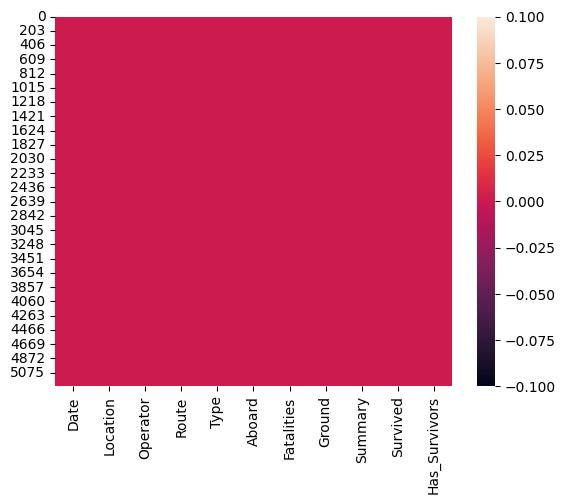

In [25]:
sns.heatmap(df.isnull())
plt.show()

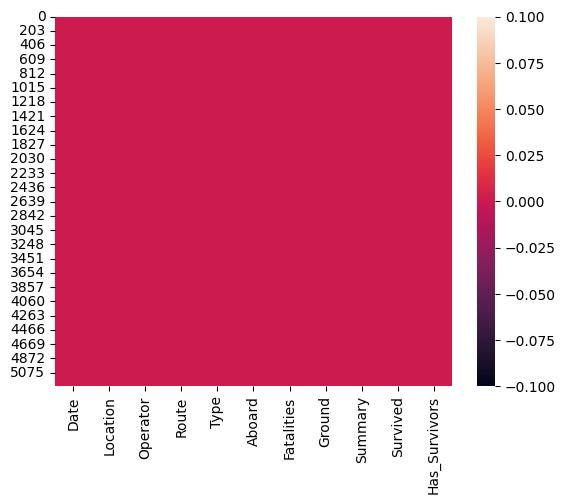

In [24]:
sns.heatmap(df.isnull())
plt.show()

In [26]:
df.drop('Summary',axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5268 non-null   datetime64[ns]
 1   Location       5268 non-null   object        
 2   Operator       5268 non-null   object        
 3   Route          5268 non-null   object        
 4   Type           5268 non-null   object        
 5   Aboard         5268 non-null   float64       
 6   Fatalities     5268 non-null   float64       
 7   Ground         5268 non-null   float64       
 8   Survived       5268 non-null   float64       
 9   Has_Survivors  5268 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 411.7+ KB


In [28]:
#looking for unique values
df.nunique()

Date             4753
Location         4304
Operator         2477
Route            3245
Type             2447
Aboard            239
Fatalities        191
Ground             50
Survived          213
Has_Survivors       2
dtype: int64

Correlation matrix
A correlation matrix is a table that contains correlation coefficients for several variables. The correlation between two
variables is represented by each cell in the table. The value ranges from -1 to 1.


<ipython-input-32-3e0f381b3d54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

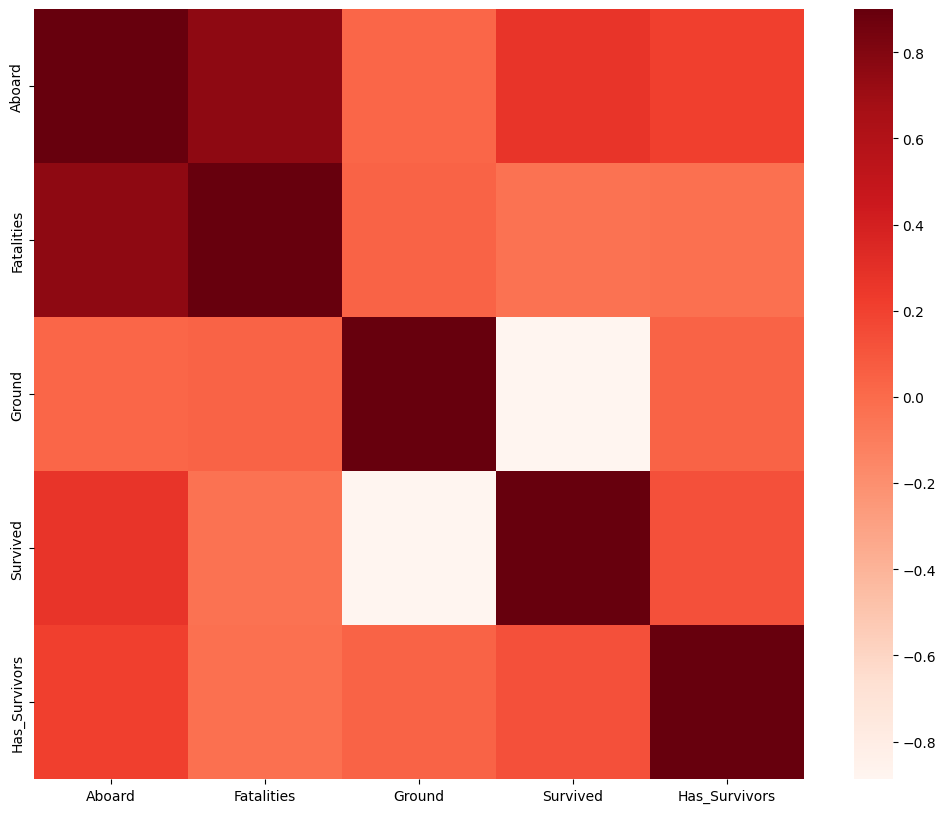

In [32]:
#Corelation amongst variables
corr = df.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Reds", square=True)

Analysing the Data, to calculate the mean of fatalities and Passengers Aboard, and to find the Min and max number of fatalities

In [33]:
#finding average of all fatalities since 1908
m=df["Fatalities"].mean()
m

20.022589217919514

In [34]:
#finding average number of passengers onboard the plane
df["Aboard"].mean()

27.43944570994685

In [35]:
#to identify which operator is the most unsafe
df.groupby(["Operator"]).mean()

<ipython-input-35-e240167b5da4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Operator"]).mean()


Aboard  Fatalities  Ground   Survived  \
Operator                                                                  
0                               9.388889    8.666667     0.0   0.722222   
A B Aerotransport               8.500000    1.500000     0.0   7.000000   
AB Aerotransport               21.333333   19.333333     0.0   2.000000   
ACES Colombia                  13.666667   13.333333     0.0   0.333333   
ADC Airlines                   80.000000   48.500000     0.0  31.500000   
...                                  ...         ...     ...        ...   
Zantop Air Transport            3.250000    3.250000     0.0   0.000000   
Zantop Airways                  2.000000    2.000000     1.0  -1.000000   
Zantop International Airlines   4.000000    4.000000     0.0   0.000000   
Zen Nippon                      2.000000    2.000000     0.0   0.000000   
de Havilland Aircraft          11.000000   11.000000     0.0   0.000000   

                               Has_Survivors  
Operator                                      
0                                   0.333333  
A B Aerotransport                   0.500000  
AB Aerotransport                    0.666667  
ACES Colombia                       0.333333  
ADC Airlines                        1.000000  
...                                      ...  
Zantop Air Transport                0.000000  
Zantop Airways                      1.000000  
Zantop International Airlines       0.000000  
Zen Nippon                          0.000000  
de Havilland Aircraft               0.000000  

[2477 rows x 5 columns]

In [36]:
#finding minimum and maxiumum number of fatalities
min_fat=df["Fatalities"].min()
print("The minimum amount of fatalities are: ",min_fat)
max_fat=df["Fatalities"].max()
print("The maximum number of fatalities are: ",max_fat)


The minimum amount of fatalities are:  0.0
The maximum number of fatalities are:  583.0


Calculating the Survival Rate

In [41]:
#To calculate survival rate
df["Survival Rate"]=100 * (df["Aboard"] - df["Fatalities"])/df["Aboard"]
df

Date                                           Location  \
0    1908-09-17                                Fort Myer, Virginia   
1    1912-07-12                            AtlantiCity, New Jersey   
2    1913-08-06                 Victoria, British Columbia, Canada   
3    1913-09-09                                 Over the North Sea   
4    1913-10-17                         Near Johannisthal, Germany   
...         ...                                                ...   
5263 2009-05-20                             Near Madiun, Indonesia   
5264 2009-05-26                  Near Isiro, DemocratiRepubliCongo   
5265 2009-06-01  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266 2009-06-07       Near Port Hope Simpson, Newfoundland, Canada   
5267 2009-06-08                  State of Arunachal Pradesh, India   

                             Operator  \
0                Military - U.S. Army   
1                Military - U.S. Navy   
2                             Private   
3              Military - German Navy   
4              Military - German Navy   
...                               ...   
5263  Military - Indonesian Air Force   
5264                      Service Air   
5265                       Air France   
5266                       Strait Air   
5267      Military - Indian Air Force   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type  Aboard  Fatalities  Ground  Survived  \
0                     Wright Flyer III     2.0         1.0     0.0       1.0   
1                            Dirigible     5.0         5.0     0.0       0.0   
2                     Curtiss seaplane     1.0         1.0     0.0       0.0   
3               Zeppelin L-1 (airship)    20.0        14.0     0.0       6.0   
4               Zeppelin L-2 (airship)    30.0        30.0     0.0       0.0   
...                                ...     ...         ...     ...       ...   
5263           Lockheed C-130 Hercules   112.0        98.0     2.0      12.0   
5264                     Antonov An-26     4.0         4.0     0.0       0.0   
5265                   Airbus A330-203   228.0       228.0     0.0       0.0   
5266  Britten-Norman BN-2A-27 Islander     1.0         1.0     0.0       0.0   
5267                     Antonov An-32    13.0        13.0     0.0       0.0   

      Has_Survivors  Survival Rate  
0                 1           50.0  
1                 0            0.0  
2                 0            0.0  
3                 1           30.0  
4                 0            0.0  
...             ...            ...  
5263              1           12.5  
5264              0            0.0  
5265              0            0.0  
5266              0            0.0  
5267              0            0.0  

[5268 rows x 11 columns]

In [42]:
df1=df[df["Fatalities"]>m]
m

20.022589217919514

In [43]:
df1

Date                                           Location  \
4    1913-10-17                         Near Johannisthal, Germany   
5    1915-03-05                                    Tienen, Belgium   
8    1916-09-24                                Billericay, England   
10   1916-11-21                                     Mainz, Germany   
13   1917-03-30                               Off Northern Germany   
...         ...                                                ...   
5246 2009-02-07                                 Manacapuru, Brazil   
5248 2009-02-12                          Clarence Center, New York   
5257 2009-04-06                                 Bandung, Indonesia   
5263 2009-05-20                             Near Madiun, Indonesia   
5265 2009-06-01  AtlantiOcean, 570 miles northeast of Natal, Br...   

                               Operator                       Route  \
4                Military - German Navy                           0   
5                Military - German Navy                           0   
8                Military - German Navy                           0   
10               Military - German Army                           0   
13               Military - German Navy                           0   
...                                 ...                         ...   
5246                    Aerotaxi Manaus               Coari - Manus   
5248  Continental Connection/Colgan Air  Newark, N.J. - Buffalo, NY   
5257    Military - Indonesian Air Force          Militiary training   
5263    Military - Indonesian Air Force            Jakarta - Maduin   
5265                         Air France      Rio de Janeiro - Paris   

                              Type  Aboard  Fatalities  Ground  Survived  \
4           Zeppelin L-2 (airship)    30.0        30.0     0.0       0.0   
5           Zeppelin L-8 (airship)    41.0        21.0     0.0      20.0   
8          Zeppelin L-32 (airship)    22.0        22.0     0.0       0.0   
10        Super Zeppelin (airship)    28.0        27.0     0.0       1.0   
13    Schutte-Lanz S-L-9 (airship)    23.0        23.0     0.0       0.0   
...                            ...     ...         ...     ...       ...   
5246         Bandeirante EMB-110P1    28.0        24.0     0.0       4.0   
5248     Bombardier DHC-8-402 Q400    49.0        49.0     1.0      -1.0   
5257   Fokker F-27 Friendship 400M    24.0        24.0     0.0       0.0   
5263       Lockheed C-130 Hercules   112.0        98.0     2.0      12.0   
5265               Airbus A330-203   228.0       228.0     0.0       0.0   

      Has_Survivors  Survival Rate  
4                 0       0.000000  
5                 1      48.780488  
8                 0       0.000000  
10                1       3.571429  
13                0       0.000000  
...             ...            ...  
5246              1      14.285714  
5248              1       0.000000  
5257              0       0.000000  
5263              1      12.500000  
5265              0       0.000000  

[1457 rows x 11 columns]

Data Visualization

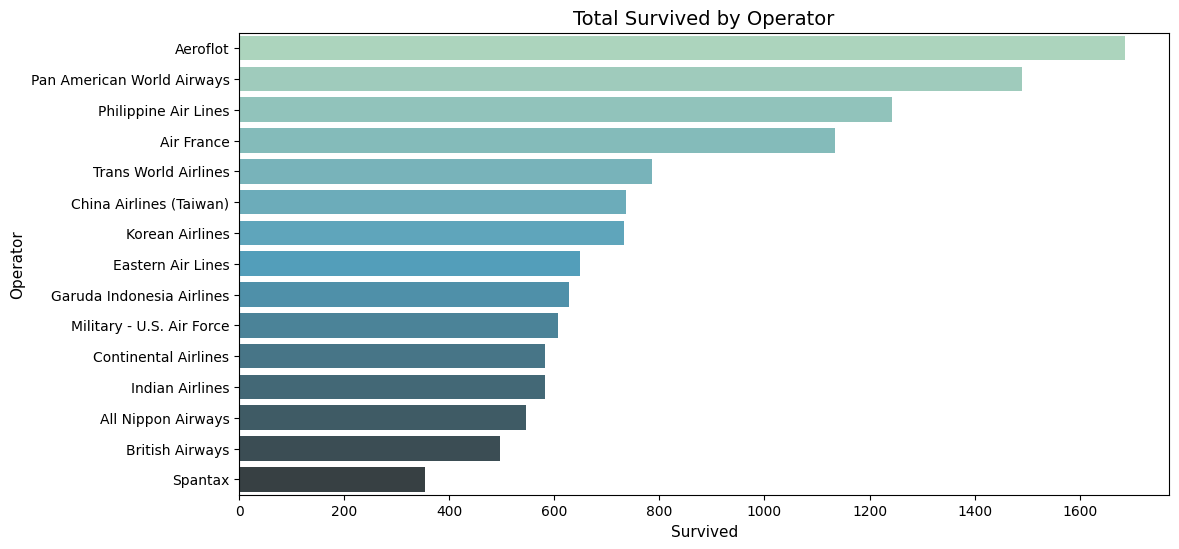

In [44]:
#Shows the Trend with respect to the highest survival passenger in crash by operator
df_2 = df.groupby('Operator')[['Survived']].sum()
df_2 = df_2.rename(columns={"Operator": "Survived"})
df_2 = df_2.sort_values(by='Survived', ascending=False)
Prop_by_OpTOP = df_2.head(15)
plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Survived", data=Prop_by_OpTOP, palette="GnBu_d", orient='h')
plt.xlabel('Survived', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Survived by Operator', loc='Center', fontsize=14)
plt.show()

In [45]:
#to show total number of Fatalities per operator
f=df1["Fatalities"]
f
o=df1["Operator"]
o
fig, ax=plt.subplots(figsize=(200,200))
ax.barh(o,f,color='orange')


<BarContainer object of 1457 artists>

<Axes: xlabel='Operator'>

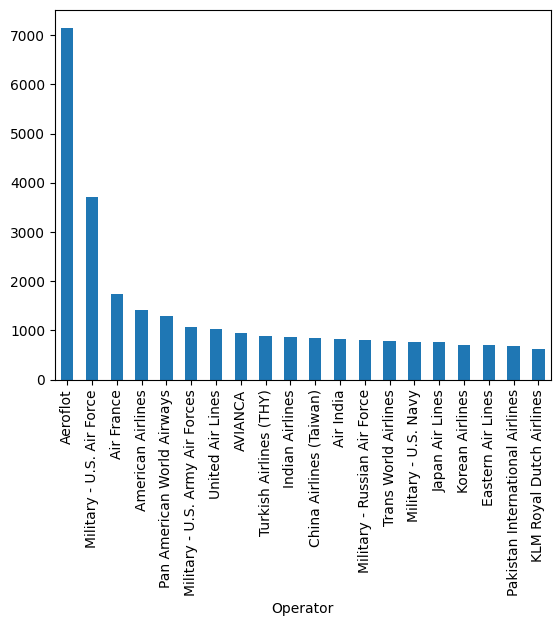

In [46]:

#most crashes by an operator
df.groupby(['Operator'])['Fatalities'].sum().sort_values( ascending=False).head(20).plot.bar()

In [49]:
df

Date                                           Location  \
0    1908-09-17                                Fort Myer, Virginia   
1    1912-07-12                            AtlantiCity, New Jersey   
2    1913-08-06                 Victoria, British Columbia, Canada   
3    1913-09-09                                 Over the North Sea   
4    1913-10-17                         Near Johannisthal, Germany   
...         ...                                                ...   
5263 2009-05-20                             Near Madiun, Indonesia   
5264 2009-05-26                  Near Isiro, DemocratiRepubliCongo   
5265 2009-06-01  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266 2009-06-07       Near Port Hope Simpson, Newfoundland, Canada   
5267 2009-06-08                  State of Arunachal Pradesh, India   

                             Operator  \
0                Military - U.S. Army   
1                Military - U.S. Navy   
2                             Private   
3              Military - German Navy   
4              Military - German Navy   
...                               ...   
5263  Military - Indonesian Air Force   
5264                      Service Air   
5265                       Air France   
5266                       Strait Air   
5267      Military - Indian Air Force   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type  Aboard  Fatalities  Ground  Survived  \
0                     Wright Flyer III     2.0         1.0     0.0       1.0   
1                            Dirigible     5.0         5.0     0.0       0.0   
2                     Curtiss seaplane     1.0         1.0     0.0       0.0   
3               Zeppelin L-1 (airship)    20.0        14.0     0.0       6.0   
4               Zeppelin L-2 (airship)    30.0        30.0     0.0       0.0   
...                                ...     ...         ...     ...       ...   
5263           Lockheed C-130 Hercules   112.0        98.0     2.0      12.0   
5264                     Antonov An-26     4.0         4.0     0.0       0.0   
5265                   Airbus A330-203   228.0       228.0     0.0       0.0   
5266  Britten-Norman BN-2A-27 Islander     1.0         1.0     0.0       0.0   
5267                     Antonov An-32    13.0        13.0     0.0       0.0   

      Has_Survivors  Survival Rate  
0                 1           50.0  
1                 0            0.0  
2                 0            0.0  
3                 1           30.0  
4                 0            0.0  
...             ...            ...  
5263              1           12.5  
5264              0            0.0  
5265              0            0.0  
5266              0            0.0  
5267              0            0.0  

[5268 rows x 11 columns]

In [50]:
#A sunburst chart showing Each operator and its AC type and its fatalities
px.sunburst(df, path=['Operator','Type'],values='Fatalities')

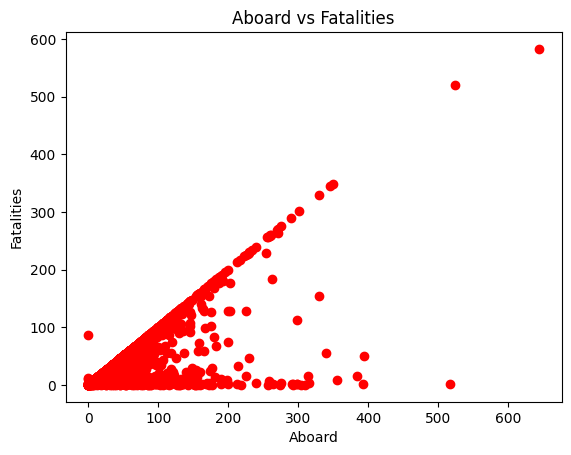

In [52]:

#Scatter chart showing Aboard vs Fatalities
plt.scatter(df["Aboard"],df["Fatalities"],color='red')
plt.title("Aboard vs Fatalities")
plt.xlabel("Aboard")
plt.ylabel("Fatalities")
plt.show()

In [53]:
df

Date                                           Location  \
0    1908-09-17                                Fort Myer, Virginia   
1    1912-07-12                            AtlantiCity, New Jersey   
2    1913-08-06                 Victoria, British Columbia, Canada   
3    1913-09-09                                 Over the North Sea   
4    1913-10-17                         Near Johannisthal, Germany   
...         ...                                                ...   
5263 2009-05-20                             Near Madiun, Indonesia   
5264 2009-05-26                  Near Isiro, DemocratiRepubliCongo   
5265 2009-06-01  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266 2009-06-07       Near Port Hope Simpson, Newfoundland, Canada   
5267 2009-06-08                  State of Arunachal Pradesh, India   

                             Operator  \
0                Military - U.S. Army   
1                Military - U.S. Navy   
2                             Private   
3              Military - German Navy   
4              Military - German Navy   
...                               ...   
5263  Military - Indonesian Air Force   
5264                      Service Air   
5265                       Air France   
5266                       Strait Air   
5267      Military - Indian Air Force   

                                          Route  \
0                                 Demonstration   
1                                   Test flight   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
5263                           Jakarta - Maduin   
5264                               Goma - Isiro   
5265                     Rio de Janeiro - Paris   
5266  Lourdes de BlanSablon - Port Hope Simpson   
5267                         Mechuka for Jorhat   

                                  Type  Aboard  Fatalities  Ground  Survived  \
0                     Wright Flyer III     2.0         1.0     0.0       1.0   
1                            Dirigible     5.0         5.0     0.0       0.0   
2                     Curtiss seaplane     1.0         1.0     0.0       0.0   
3               Zeppelin L-1 (airship)    20.0        14.0     0.0       6.0   
4               Zeppelin L-2 (airship)    30.0        30.0     0.0       0.0   
...                                ...     ...         ...     ...       ...   
5263           Lockheed C-130 Hercules   112.0        98.0     2.0      12.0   
5264                     Antonov An-26     4.0         4.0     0.0       0.0   
5265                   Airbus A330-203   228.0       228.0     0.0       0.0   
5266  Britten-Norman BN-2A-27 Islander     1.0         1.0     0.0       0.0   
5267                     Antonov An-32    13.0        13.0     0.0       0.0   

      Has_Survivors  Survival Rate  
0                 1           50.0  
1                 0            0.0  
2                 0            0.0  
3                 1           30.0  
4                 0            0.0  
...             ...            ...  
5263              1           12.5  
5264              0            0.0  
5265              0            0.0  
5266              0            0.0  
5267              0            0.0  

[5268 rows x 11 columns]

Visualising Crashes every year

<Axes: title={'center': 'Count of crashes by Year'}, xlabel='Date', ylabel='Total crashes'>

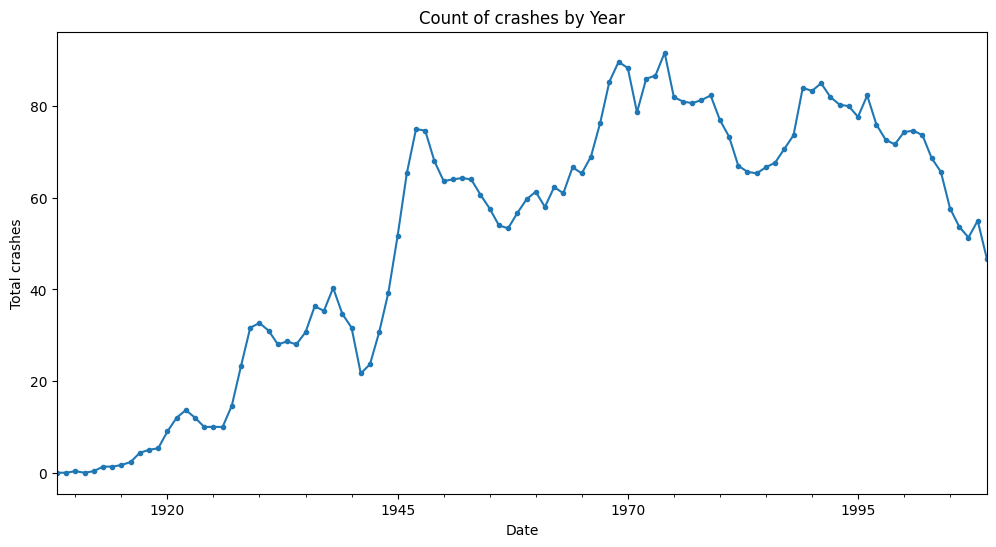

In [54]:
#Crashes per year
crashed_by_year=df_date_index.resample('1y').size().rolling(3).mean().fillna(0)
crashed_by_year.plot(figsize=[12, 6], title='Count of crashes by Year', ylabel='Total crashes', marker=".")

In [55]:
#To find out how many Fatalities were due to military operators
logic=df['Operator'].str.contains("Military")
df["Is Military?"]=logic

In [56]:
df.head()

Date                            Location                Operator  \
0 1908-09-17                 Fort Myer, Virginia    Military - U.S. Army   
1 1912-07-12             AtlantiCity, New Jersey    Military - U.S. Navy   
2 1913-08-06  Victoria, British Columbia, Canada                 Private   
3 1913-09-09                  Over the North Sea  Military - German Navy   
4 1913-10-17          Near Johannisthal, Germany  Military - German Navy   

           Route                    Type  Aboard  Fatalities  Ground  \
0  Demonstration        Wright Flyer III     2.0         1.0     0.0   
1    Test flight               Dirigible     5.0         5.0     0.0   
2              0        Curtiss seaplane     1.0         1.0     0.0   
3              0  Zeppelin L-1 (airship)    20.0        14.0     0.0   
4              0  Zeppelin L-2 (airship)    30.0        30.0     0.0   

   Survived  Has_Survivors  Survival Rate Is Military?  
0       1.0              1           50.0         True  
1       0.0              0            0.0         True  
2       0.0              0            0.0        False  
3       6.0              1           30.0         True  
4       0.0              0            0.0         True

In [57]:
df=df.replace(np.nan, 0)

In [58]:
df.head(6)

Date                            Location                Operator  \
0 1908-09-17                 Fort Myer, Virginia    Military - U.S. Army   
1 1912-07-12             AtlantiCity, New Jersey    Military - U.S. Navy   
2 1913-08-06  Victoria, British Columbia, Canada                 Private   
3 1913-09-09                  Over the North Sea  Military - German Navy   
4 1913-10-17          Near Johannisthal, Germany  Military - German Navy   
5 1915-03-05                     Tienen, Belgium  Military - German Navy   

           Route                    Type  Aboard  Fatalities  Ground  \
0  Demonstration        Wright Flyer III     2.0         1.0     0.0   
1    Test flight               Dirigible     5.0         5.0     0.0   
2              0        Curtiss seaplane     1.0         1.0     0.0   
3              0  Zeppelin L-1 (airship)    20.0        14.0     0.0   
4              0  Zeppelin L-2 (airship)    30.0        30.0     0.0   
5              0  Zeppelin L-8 (airship)    41.0        21.0     0.0   

   Survived  Has_Survivors  Survival Rate Is Military?  
0       1.0              1      50.000000         True  
1       0.0              0       0.000000         True  
2       0.0              0       0.000000        False  
3       6.0              1      30.000000         True  
4       0.0              0       0.000000         True  
5      20.0              1      48.780488         True

In [59]:
df['Is Military?'].value_counts()

False    4487
True      781
Name: Is Military?, dtype: int64

<Axes: >

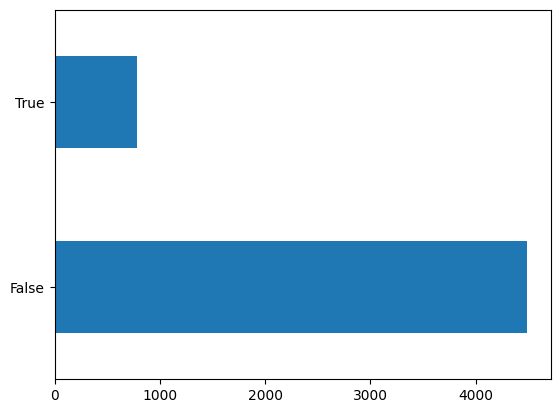

In [60]:
#How many Military planes?
df['Is Military?'].value_counts().plot(kind='barh')

<Axes: title={'center': 'Fatalities Per Crash'}, ylabel='Is Military?'>

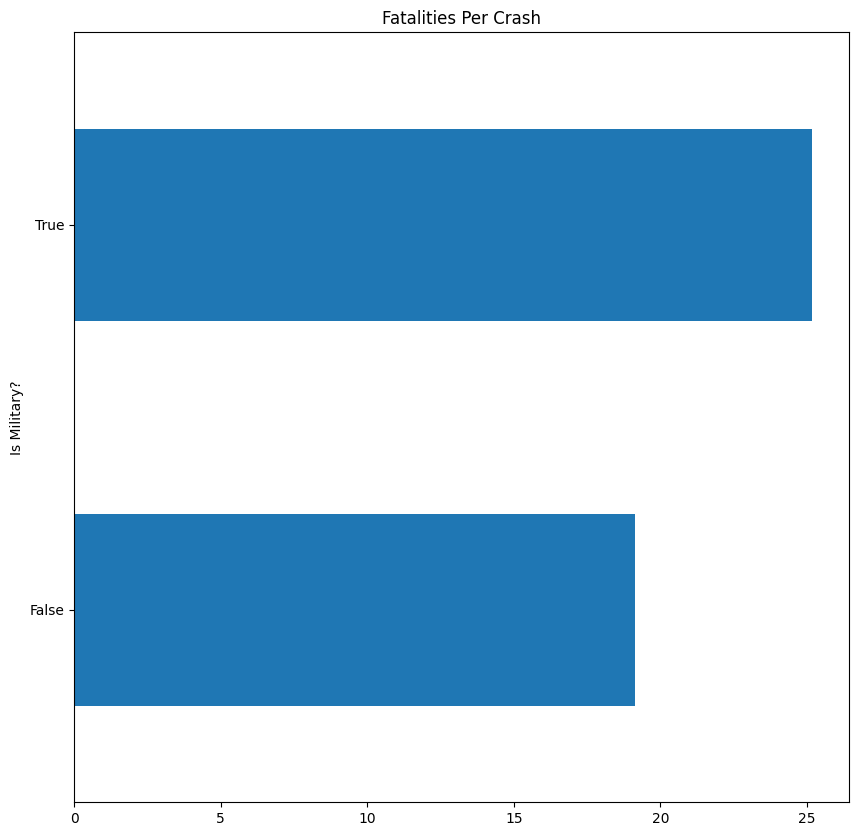

In [61]:
#how many military fatalities per crash
df.groupby(['Is Military?'])['Fatalities'].mean().plot(kind='barh',title='Fatalities Per Crash', figsize=(10,10))

In [64]:
#To extract year and calculate year related Data Analysis
df['Date'] = pd.to_datetime(df['Date'])

df.head()


Date                            Location                Operator  \
0 1908-09-17                 Fort Myer, Virginia    Military - U.S. Army   
1 1912-07-12             AtlantiCity, New Jersey    Military - U.S. Navy   
2 1913-08-06  Victoria, British Columbia, Canada                 Private   
3 1913-09-09                  Over the North Sea  Military - German Navy   
4 1913-10-17          Near Johannisthal, Germany  Military - German Navy   

           Route                    Type  Aboard  Fatalities  Ground  \
0  Demonstration        Wright Flyer III     2.0         1.0     0.0   
1    Test flight               Dirigible     5.0         5.0     0.0   
2              0        Curtiss seaplane     1.0         1.0     0.0   
3              0  Zeppelin L-1 (airship)    20.0        14.0     0.0   
4              0  Zeppelin L-2 (airship)    30.0        30.0     0.0   

   Survived  Has_Survivors  Survival Rate Is Military?  
0       1.0              1           50.0         True  
1       0.0              0            0.0         True  
2       0.0              0            0.0        False  
3       6.0              1           30.0         True  
4       0.0              0            0.0         True

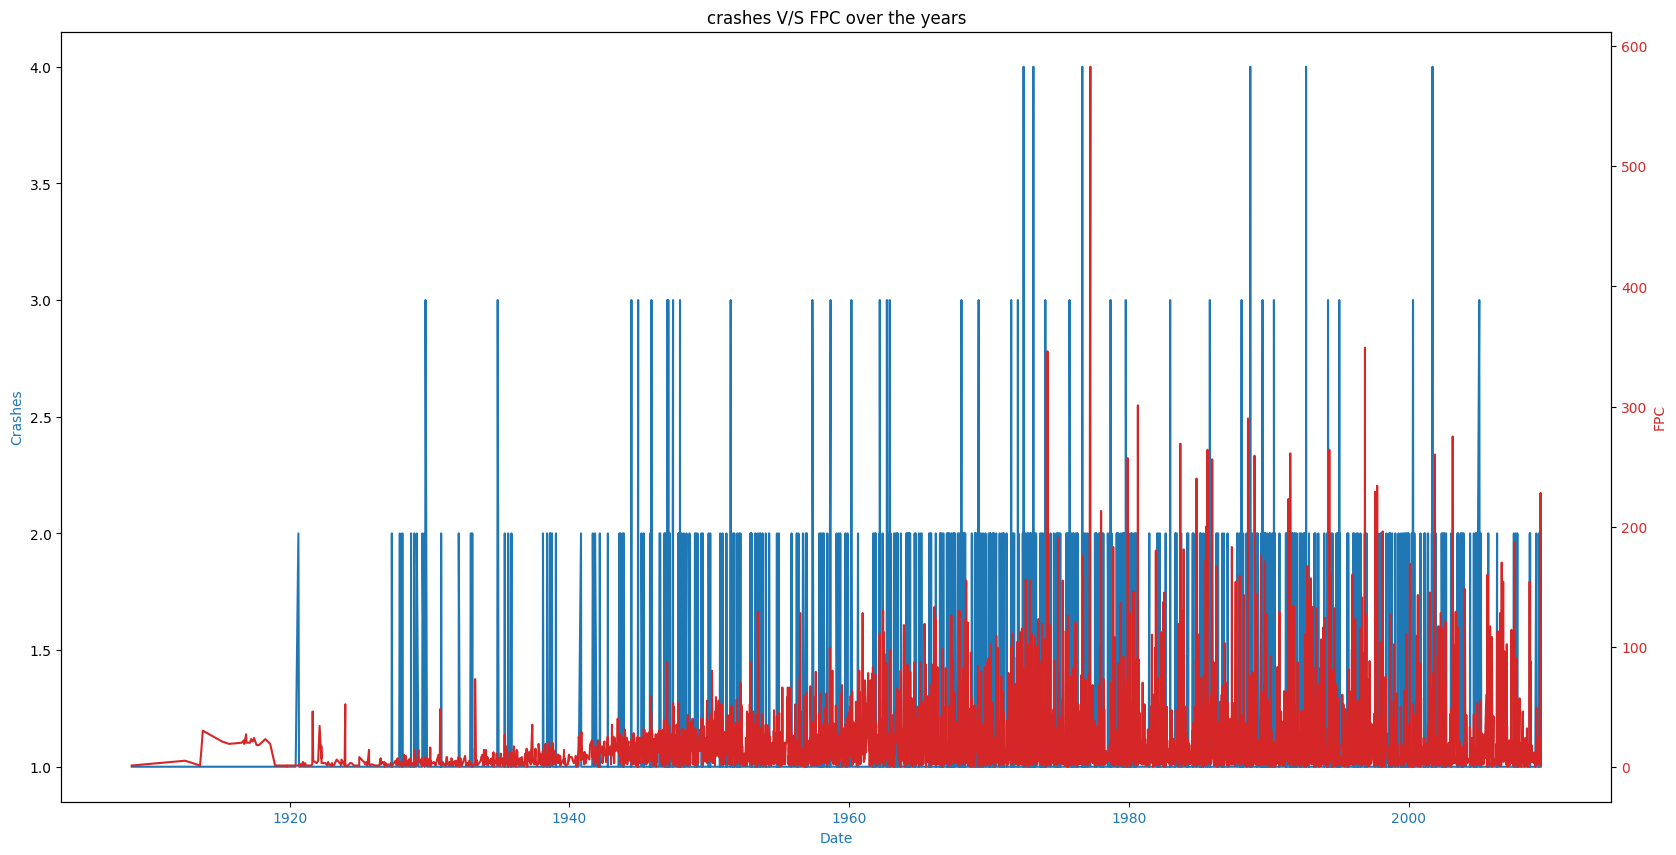

In [73]:

#Crashes vs Fatailities per crash over the years
a=df.groupby('Date').size()
a=pd.DataFrame(a)
a.rename(columns={0: 'Crashes'},inplace=True)

b=df.groupby('Date')['Fatalities'].mean()
b=pd.DataFrame(b)
b.rename(columns={'Fatalities':'FPC'},inplace=True)

df_1=b.join(a,how='inner',on='Date')

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)

color='tab:blue'
ax.set_ylabel('Crashes',color=color)
ax.tick_params(axis='y',labelcolor=color)
ax.set_xlabel('Date',color=color)
ax.plot(df_1.index, df_1['Crashes'],color=color)
ax1=ax.twinx()

color='tab:red'
ax1.set_ylabel('FPC',color=color)
ax1.tick_params(axis='y',labelcolor=color)
ax1.plot(df_1.index, df_1['FPC'], color=color)

plt.title("crashes V/S FPC over the years")
plt.show()


In [ ]:
df3=df[df['Date'] > 2000]
year_count = df3.groupby(df3['Date'].dt.year)['Date'].count()

plt.figure(figsize= (16,10 ))
plt.plot(year_count.index, year_count['Date'], marker= '.')
plt.xlabel('Date')
plt.ylabel('Total Accidents')
plt.show()